# Classification data-set

In [1]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Pipeline - to avoid data leak

In [4]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 77.743 (1.296)


# Basic Data Cleaning

In [5]:
# 1. Messy Datasets
# 2. Identify Columns That Contain a Single Value
# 3. Delete Columns That Contain a Single Value
# 4. Consider Columns That Have Very Few Values
# 5. Remove Columns That Have A Low Variance
# 6. Identify Rows that Contain Duplicate Data
# 7. Delete Rows that Contain Duplicate Data

In [6]:
import pandas as pd 
data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/oil-spill.csv")
data.head(1)

,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0.1.1,2.19.1,310,16110,0.2.1,138.68,89,69,2850,1000,763.16,135.46,3.73,0.3,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.3,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.0,0.0,0.0,0.0,704,40140,0.0,68.65,89,69,5750.0,11500.0,9593.48,1648.8,0.6,0,51572.04,65.73,6.26,0


# Select Categorical Input Features

In [148]:
# Chi-Squared Statistic. 
# Mutual Information Statistic.

In [ ]:
%reset -f 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot

import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/breast-cancer.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare input data
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare output data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# feature selection
fschi2 = SelectKBest(score_func=chi2, k=6) # 4 Features looks important
fsmic = SelectKBest(score_func=mutual_info_classif, k=6) # few Features has zero importance

fschi2.fit(X_train_enc, y_train_enc)
X_train_fschi2 = fschi2.transform(X_train_enc)
X_test_fschi2 = fschi2.transform(X_test_enc)

fsmic.fit(X_train_enc, y_train_enc)
X_train_fsmic = fsmic.transform(X_train_enc)
X_test_fsmic = fsmic.transform(X_test_enc)

# what are scores for the features
for i in range(len(fschi2.scores_)):
    print('Feature %d: %f' % (i, fschi2.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fschi2.scores_))], fschi2.scores_)
pyplot.show()

print("=============")

# what are scores for the features
for i in range(len(fsmic.scores_)):
    print('Feature %d: %f' % (i, fsmic.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fsmic.scores_))], fsmic.scores_)
pyplot.show()

## Evaluation of a model using all input features

In [140]:
X_train_enc.shape, X_train_fschi2.shape, X_train_fsmic.shape

((191, 9), (191, 6), (191, 6))

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

75.78947368421053


## Evaluation of a model using selected input features

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fschi2, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fschi2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

74.73684210526315


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fsmic, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fsmic)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

74.73684210526315


# Select Numerical Features

In [ ]:
# ANOVA F-Statistic. 
# Mutual Information Statistics.

In [149]:
%reset -f 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from matplotlib import pyplot

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/pima-indians-diabetes.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


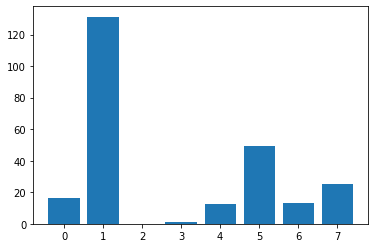

In [155]:
# feature selection
fsAF = SelectKBest(score_func=f_classif, k=4) 

fsAF.fit(X_train, y_train)
X_train_fsAF = fsAF.transform(X_train)
X_test_fsAF = fsAF.transform(X_test)

# what are scores for the features
for i in range(len(fsAF.scores_)):
    print('Feature %d: %f' % (i, fsAF.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fsAF.scores_))], fsAF.scores_)
pyplot.show()


In [156]:
X_train.shape, X_train_fsAF.shape

((514, 8), (514, 4))

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fsAF, y_train)

# evaluate the model
yhat = model.predict(X_test_fsAF)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

78.74015748031496


# Numerical Feature selection for Regression

In [ ]:
# Correlation Statistics. 
# Mutual Information Statistics.

## Model using all features

In [162]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# load the dataset 
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 
# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 
# evaluate the model 

yhat = model.predict(X_test) 
# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08569191074140448


## Model using correlation features

In [167]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression

# load the dataset 
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
print(X.shape)
# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
fs_corr = SelectKBest(score_func=f_regression, k=70)
fs_corr.fit(X_train, y_train)
X_train_fs_corr = fs_corr.transform(X_train)
X_test_fs_corr = fs_corr.transform(X_test)

# fit the model 
model = LinearRegression() 
model.fit(X_train_fs_corr, y_train) 
# evaluate the model 

yhat = model.predict(X_test_fs_corr) 
# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

(1000, 100)
0.08245530329051184


## Model using Mutual Information Features

In [170]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# load the dataset 
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
fs_corr = SelectKBest(score_func=mutual_info_regression, k=70)
fs_corr.fit(X_train, y_train)
X_train_fs_corr = fs_corr.transform(X_train)
X_test_fs_corr = fs_corr.transform(X_test)
# fit the model 
model = LinearRegression() 
model.fit(X_train_fs_corr, y_train) 
# evaluate the model 

yhat = model.predict(X_test_fs_corr) 
# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08256189653226677


# RFE

In [159]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# scale the test dataset : only transform to avoid data leak
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

# define RFE
from sklearn.feature_selection import RFE
clf = RFE(estimator=LogisticRegression(), n_features_to_select=5)
# fit RFE
clf.fit(X_train,y_train)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, clf.support_[i], clf.ranking_[i]))

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.776
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=False, Rank: 6
Column: 3, Selected=False, Rank: 2
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 4
Column: 6, Selected=False, Rank: 5
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3
accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.7752


# Automatic RFE

In [171]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# scale the test dataset : only transform to avoid data leak
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

# define RFE
from sklearn.feature_selection import RFECV
clf = RFECV(estimator=LogisticRegression())
# fit RFE
clf.fit(X_train,y_train)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, clf.support_[i], clf.ranking_[i]))

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.776
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=False, Rank: 4
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 2
Column: 6, Selected=False, Rank: 3
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
accuracy_score on training data:  0.7788
accuracy_score on test data:  0.774
